In [1]:
import pandas as pd
import sys

def load_data_csv(file_path):
    try:
        csv_file = pd.read_csv(file_path)
        print("Данные успешно загружены.")
        return csv_file
    except FileNotFoundError as e:
        print(f"Ошибка при загрузке данных: {e}")
        sys.exit(1)
    except ValueError as e:
        print(f"Ошибка при загрузке данных: {e}")
        sys.exit(1)
    except TypeError as e:
        print(f"Ошибка при загрузке данных: {e}")
        sys.exit(1)
    except Exception as e:
        print(f"Ошибка при загрузке данных: {e}")
        sys.exit(1)

In [2]:
# Загрузка данных
file_path = 'ds_salaries.csv'
data = load_data_csv(file_path)

# преобразование данных
filtered_df = data[['index_series', 'work_year', 'experience_level', 'employment_type', 'job_title', 'salary', 'salary_currency', 'salary_in_usd', 'employee_residence', 'remote_ratio', 'company_location', 'company_size']]
data_tuple = [tuple(row) for row in filtered_df.to_numpy()] 

Данные успешно загружены.


In [4]:
import sqlite3

# Подключение к SQLite базе данных (или создание, если не существует)
conn = sqlite3.connect('mydatabase.db')
cursor = conn.cursor()

# Создание таблицы "salaries_analyst"
cursor.execute('''CREATE TABLE IF NOT EXISTS salaries_analyst (
    index_series INTEGER PRIMARY KEY,
    work_year INTEGER NOT NULL,
    experience_level TEXT NOT NULL,
    employment_type TEXT,
    job_title TEXT,
    salary INTEGER NOT NULL,
    salary_currency TEXT,
    salary_in_usd INTEGER NOT NULL,
    employee_residence TEXT,
    remote_ratio INTEGER,
    company_location TEXT,
    company_size TEXT
)''')

try:
    cursor.executemany("INSERT INTO salaries_analyst (index_series, work_year, experience_level, employment_type, job_title, salary, salary_currency, salary_in_usd, employee_residence, remote_ratio, company_location, company_size) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)", data_tuple)
except:
        pass

# выод данных
cursor.execute("SELECT * FROM salaries_analyst")
salaries_analyst = cursor.fetchall()
for salaries in salaries_analyst:
    print(salaries)

# Закрытие соединения и сохранение изменений
conn.commit()
conn.close()

(0, 2020, 'MI', 'FT', 'Data Scientist', 70000, 'EUR', 79833, 'DE', 0, 'DE', 'L')
(1, 2020, 'SE', 'FT', 'Data Engineer', 260000, 'USD', 260000, 'JP', 0, 'JP', 'S')
(2, 2020, 'SE', 'FT', 'Big Data Engineer', 85000, 'GBP', 109024, 'GB', 50, 'GB', 'M')
(3, 2020, 'MI', 'FT', 'Product Data Analyst', 20000, 'USD', 20000, 'HN', 0, 'HN', 'S')
(6, 2020, 'SE', 'FT', 'Lead Data Scientist', 190000, 'USD', 190000, 'US', 100, 'US', 'S')
(7, 2020, 'MI', 'FT', 'Data Scientist', 11000000, 'HUF', 35735, 'HU', 50, 'HU', 'L')
(9, 2020, 'SE', 'FT', 'Lead Data Engineer', 125000, 'USD', 125000, 'NZ', 50, 'NZ', 'S')
(10, 2020, 'EN', 'FT', 'Data Scientist', 45000, 'EUR', 51321, 'FR', 0, 'FR', 'S')
(11, 2020, 'MI', 'FT', 'Data Scientist', 3000000, 'INR', 40481, 'IN', 0, 'IN', 'L')
(12, 2020, 'EN', 'FT', 'Data Scientist', 35000, 'EUR', 39916, 'FR', 0, 'FR', 'M')
(15, 2020, 'MI', 'FT', 'Data Analyst', 8000, 'USD', 8000, 'PK', 50, 'PK', 'L')
(16, 2020, 'EN', 'FT', 'Data Engineer', 4450000, 'JPY', 41689, 'JP', 100, 

In [ ]:
'''Напишите несколько SQL-запросов для извлечения данных из таблиц базы данных. Используйте условия фильтрации 
   (например, WHERE) для получения нужных данных.'''

In [5]:
conn = sqlite3.connect('mydatabase.db')
cursor = conn.cursor()

# Выбор столбцов с зарплатой более 200 000
cursor.execute("SELECT salary, salary_currency, salary_in_usd FROM salaries_analyst WHERE salary_in_usd > 200000")
result = cursor.fetchall()
for row in result:
    print(row)

conn.close()

(260000, 'USD', 260000)
(450000, 'USD', 450000)
(230000, 'USD', 230000)
(225000, 'USD', 225000)
(416000, 'USD', 416000)
(256000, 'USD', 256000)
(242000, 'USD', 242000)
(220110, 'USD', 220110)
(243900, 'USD', 243900)
(224000, 'USD', 224000)
(211500, 'USD', 211500)
(208775, 'USD', 208775)
(260000, 'USD', 260000)
(241000, 'USD', 241000)
(220000, 'USD', 220000)
(220000, 'USD', 220000)
(324000, 'USD', 324000)
(216000, 'USD', 216000)
(210000, 'USD', 210000)
(230000, 'USD', 230000)
(214000, 'USD', 214000)
(266400, 'USD', 266400)
(213120, 'USD', 213120)
(206699, 'USD', 206699)
(200100, 'USD', 200100)
(205300, 'USD', 205300)
(205300, 'USD', 205300)
(210000, 'USD', 210000)
(210000, 'USD', 210000)
(210000, 'USD', 210000)
(220110, 'USD', 220110)
(230000, 'USD', 230000)
(210000, 'USD', 210000)


In [6]:
conn = sqlite3.connect('mydatabase.db')
cursor = conn.cursor()

# Выбор столбцов по идексу
cursor.execute("SELECT job_title, salary, salary_currency, salary_in_usd FROM salaries_analyst WHERE index_series = 600")
result = cursor.fetchall()
for row in result:
    print(row)

conn.close()

('Data Analyst', 67000, 'USD', 67000)


In [7]:
conn = sqlite3.connect('mydatabase.db')
cursor = conn.cursor()

# Выбор столбцов с определенными профессиями
cursor.execute("SELECT job_title, salary, salary_currency FROM salaries_analyst WHERE job_title in ('Data Analyst', 'Data Scientist') and experience_level = 'SE'")
result = cursor.fetchall()
for row in result:
    print(row)

conn.close()

('Data Scientist', 80000, 'EUR')
('Data Scientist', 45000, 'EUR')
('Data Analyst', 80000, 'USD')
('Data Scientist', 110000, 'CAD')
('Data Analyst', 90000, 'CAD')
('Data Scientist', 130000, 'CAD')
('Data Analyst', 54000, 'EUR')
('Data Scientist', 65720, 'EUR')
('Data Scientist', 180000, 'TRY')
('Data Analyst', 155000, 'USD')
('Data Analyst', 120600, 'USD')
('Data Analyst', 102100, 'USD')
('Data Analyst', 84900, 'USD')
('Data Scientist', 136620, 'USD')
('Data Scientist', 99360, 'USD')
('Data Scientist', 90000, 'GBP')
('Data Scientist', 80000, 'GBP')
('Data Scientist', 146000, 'USD')
('Data Scientist', 123000, 'USD')
('Data Analyst', 99000, 'USD')
('Data Analyst', 116000, 'USD')
('Data Scientist', 165220, 'USD')
('Data Scientist', 120160, 'USD')
('Data Analyst', 90320, 'USD')
('Data Analyst', 124190, 'USD')
('Data Analyst', 170000, 'USD')
('Data Analyst', 112900, 'USD')
('Data Analyst', 90320, 'USD')
('Data Analyst', 112900, 'USD')
('Data Analyst', 90320, 'USD')
('Data Analyst', 136600, '

In [8]:
# DELETE
conn = sqlite3.connect('mydatabase.db')
cursor = conn.cursor()

# Удаление данных по признакам маленькой компании и местонахождение компании в USA
cursor.execute("DELETE FROM salaries_analyst WHERE company_location = 'US' and company_size = 'L'")
cursor.execute("SELECT * FROM salaries_analyst")
result = cursor.fetchall()
for row in result:
    print(row)

# Закрытие соединения
conn.commit()
conn.close()

(0, 2020, 'MI', 'FT', 'Data Scientist', 70000, 'EUR', 79833, 'DE', 0, 'DE', 'L')
(1, 2020, 'SE', 'FT', 'Data Engineer', 260000, 'USD', 260000, 'JP', 0, 'JP', 'S')
(2, 2020, 'SE', 'FT', 'Big Data Engineer', 85000, 'GBP', 109024, 'GB', 50, 'GB', 'M')
(3, 2020, 'MI', 'FT', 'Product Data Analyst', 20000, 'USD', 20000, 'HN', 0, 'HN', 'S')
(6, 2020, 'SE', 'FT', 'Lead Data Scientist', 190000, 'USD', 190000, 'US', 100, 'US', 'S')
(7, 2020, 'MI', 'FT', 'Data Scientist', 11000000, 'HUF', 35735, 'HU', 50, 'HU', 'L')
(9, 2020, 'SE', 'FT', 'Lead Data Engineer', 125000, 'USD', 125000, 'NZ', 50, 'NZ', 'S')
(10, 2020, 'EN', 'FT', 'Data Scientist', 45000, 'EUR', 51321, 'FR', 0, 'FR', 'S')
(11, 2020, 'MI', 'FT', 'Data Scientist', 3000000, 'INR', 40481, 'IN', 0, 'IN', 'L')
(12, 2020, 'EN', 'FT', 'Data Scientist', 35000, 'EUR', 39916, 'FR', 0, 'FR', 'M')
(15, 2020, 'MI', 'FT', 'Data Analyst', 8000, 'USD', 8000, 'PK', 50, 'PK', 'L')
(16, 2020, 'EN', 'FT', 'Data Engineer', 4450000, 'JPY', 41689, 'JP', 100, 

In [10]:
# UPDATE (Обновление данных):

conn = sqlite3.connect('mydatabase.db')
cursor = conn.cursor()

print('Данные до изменения:')
cursor.execute("SELECT * FROM salaries_analyst WHERE index_series = 1")
result = cursor.fetchall()
for row in result:
    print(row)

# Обновление данных в таблице "salaries_analyst" для определенной записи
cursor.execute("UPDATE salaries_analyst SET job_title = 'Big Data Engineer' WHERE index_series = 1")

print('Данные после изменения:')
cursor.execute("SELECT * FROM salaries_analyst WHERE index_series = 1")
result = cursor.fetchall()
for row in result:
    print(row)
    
    
conn.commit()
conn.close()

Данные до изменения:
(1, 2020, 'SE', 'FT', 'Data Engineer', 260000, 'USD', 260000, 'JP', 0, 'JP', 'S')
Данные после изменения:
(1, 2020, 'SE', 'FT', 'Big Data Engineer', 260000, 'USD', 260000, 'JP', 0, 'JP', 'S')


In [ ]:
'''Напишите SQL-запросы, использующие агрегатные функции (SUM, AVG, COUNT) для выполнения расчетов по данным таблицы.'''

In [11]:
conn = sqlite3.connect('mydatabase.db')
cursor = conn.cursor()

# Выбор столбцов с определенными профессиями и расчет средней ЗП
cursor.execute("SELECT job_title, experience_level, avg(salary) as avg_salary FROM salaries_analyst WHERE job_title in ('Data Analyst', 'Data Scientist') GROUP BY job_title, experience_level ORDER BY avg_salary DESC")
result = cursor.fetchall()
for row in result:
    print(row)

conn.close()

('Data Scientist', 'MI', 1065869.8076923077)
('Data Scientist', 'EN', 323290.4761904762)
('Data Scientist', 'SE', 149592.08333333334)
('Data Analyst', 'EX', 120000.0)
('Data Analyst', 'SE', 110418.96226415095)
('Data Analyst', 'EN', 91776.0)
('Data Analyst', 'MI', 63813.739130434784)


In [12]:
conn = sqlite3.connect('mydatabase.db')
cursor = conn.cursor()

# Выбор столбцов с фильтром по размеру компании и количество строк
cursor.execute("SELECT work_year, COUNT(experience_level) as count_years FROM salaries_analyst WHERE company_size = 'S'")
result = cursor.fetchall()
for row in result:
    print(row)

# Выбор столбцов с определенными профессиями и расчет средней ЗП по группам
cursor.execute("SELECT job_title, company_size, SUM(salary) OVER (PARTITION BY company_size order by company_size) as count_years FROM salaries_analyst WHERE job_title in ('Data Scientist', 'Machine Learning Manager', 'Product Data Analyst', 'Data Analyst') group by job_title")
result = cursor.fetchall()
for row in result:
    print(row)
    
conn.close()

(2020, 83)
('Data Analyst', 'L', 235000)
('Data Scientist', 'L', 235000)
('Machine Learning Manager', 'L', 235000)
('Product Data Analyst', 'S', 20000)


In [13]:
conn = sqlite3.connect('mydatabase.db')
cursor = conn.cursor()

# Выбор определенных столбцов и функции ранжирования
cursor.execute("SELECT job_title, row_number() over (partition by employment_type order by job_title desc), rank() over (partition by employment_type order by job_title desc), dense_rank() over (partition by employment_type order by job_title desc) FROM salaries_analyst group by job_title")
result = cursor.fetchall()
for row in result:
    print(row)
    
conn.close()

('Staff Data Scientist', 1, 1, 1)
('Computer Vision Engineer', 1, 1, 1)
('Research Scientist', 1, 1, 1)
('Product Data Analyst', 2, 2, 2)
('Principal Data Scientist', 3, 3, 3)
('Principal Data Engineer', 4, 4, 4)
('Principal Data Analyst', 5, 5, 5)
('Marketing Data Analyst', 6, 6, 6)
('Machine Learning Scientist', 7, 7, 7)
('Machine Learning Manager', 8, 8, 8)
('Machine Learning Infrastructure Engineer', 9, 9, 9)
('Machine Learning Engineer', 10, 10, 10)
('Machine Learning Developer', 11, 11, 11)
('Lead Machine Learning Engineer', 12, 12, 12)
('Lead Data Scientist', 13, 13, 13)
('Lead Data Engineer', 14, 14, 14)
('Lead Data Analyst', 15, 15, 15)
('Head of Machine Learning', 16, 16, 16)
('Head of Data Science', 17, 17, 17)
('Head of Data', 18, 18, 18)
('Finance Data Analyst', 19, 19, 19)
('ETL Developer', 20, 20, 20)
('Director of Data Science', 21, 21, 21)
('Director of Data Engineering', 22, 22, 22)
('Data Scientist', 23, 23, 23)
('Data Science Manager', 24, 24, 24)
('Data Science Eng

In [ ]:
'''Визуализируйте данные. Используйте библиотеки Python, такие как Matplotlib или Seaborn, для визуализации данных, 
   извлеченных из базы данных. Постройте графики или диаграммы, которые помогут проанализировать и понять данные.'''

In [16]:
import matplotlib.pyplot as plt

def scatter_data(plot_data, num_points=90):
    plt.figure(figsize=(10, 6))
    plt.scatter(range(num_points), plot_data[:num_points], color='blue', label='Сумма ЗП')
    plt.title(f'Общая сумма выплаченной зарплаты в USD')
    plt.legend()
    plt.savefig(f'scatter.jpg', bbox_inches='tight')
    plt.show()

def hist_data(plot_data):
    plt.figure(figsize=(10, 6))
    plt.hist(plot_data, bins=20, density=True, color='blue', label='Сумма ЗП')
    plt.title(f'Общая сумма выплаченной зарплаты в USD за 2021 год')
    plt.xlabel(f'Зараплата')
    plt.legend()
    plt.savefig(f'hist.jpg', bbox_inches='tight')
    plt.show()
    
def bar_data(plot_data_x, plot_data_y):
    plt.figure(figsize=(10, 6))
    plt.bar(plot_data_x, plot_data_y)
    plt.plot(plot_data_y, color='green', marker='o', markersize=7)
    plt.xlabel(f'Типы профессий')
    plt.ylabel(f'Средняя зараплата')
    plt.title(f'Общая сумма выплаченной зарплаты в USD')
    plt.legend()
    plt.savefig(f'bar.jpg', bbox_inches='tight')
    plt.show()

def plot_data(plot_data, num_points=100):
    plt.figure(figsize=(10, 6))
    plt.plot(plot_data, color='green', marker='o', markersize=3)
    plt.title(f'Общая сумма выплаченной зарплаты в USD (первые {num_points} точек)')
    plt.legend()
    plt.savefig(f'plot.jpg', bbox_inches='tight')
    plt.show()  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


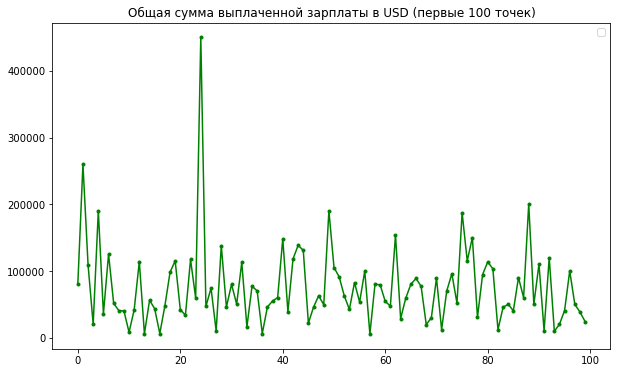

In [17]:
conn = sqlite3.connect('mydatabase.db')
cursor = conn.cursor()

df = pd.read_sql_query("SELECT salary_in_usd FROM salaries_analyst limit 100", conn)
plot_data(df)

conn.close()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


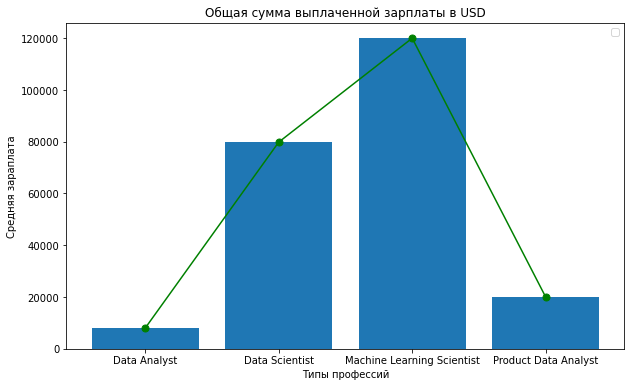

In [18]:
conn = sqlite3.connect('mydatabase.db')
cursor = conn.cursor()
 
df = pd.read_sql_query("SELECT job_title, salary_in_usd FROM salaries_analyst where job_title in ('Data Scientist','Data Analyst','Product Data Analyst', 'Machine Learning Scientist') group by job_title", conn)
bar_data(df['job_title'],df['salary_in_usd'])

# Закрытие соединения
conn.close()

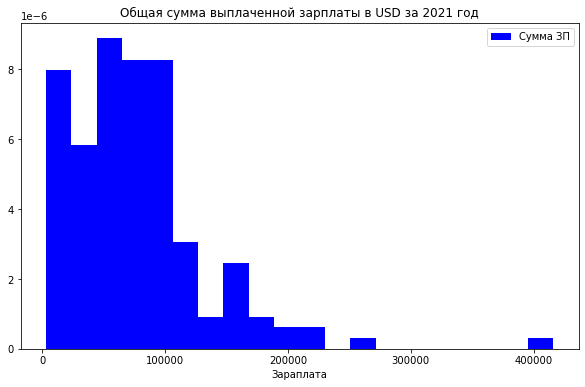

In [19]:
conn = sqlite3.connect('mydatabase.db')
cursor = conn.cursor()
 
df = pd.read_sql_query("SELECT salary_in_usd FROM salaries_analyst where work_year = 2021", conn)
hist_data(df['salary_in_usd'])

# Закрытие соединения
conn.close()

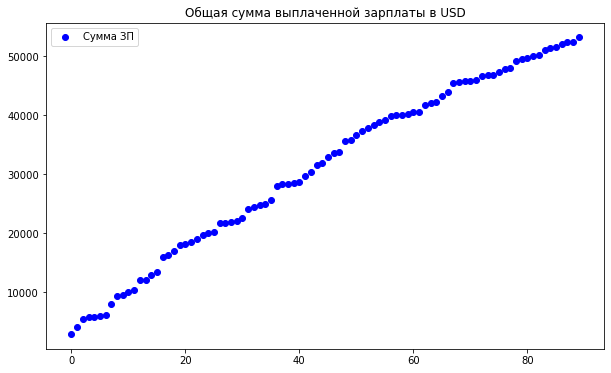

In [20]:
conn = sqlite3.connect('mydatabase.db')
cursor = conn.cursor()

df = pd.read_sql_query("SELECT salary_in_usd FROM salaries_analyst group by salary_in_usd limit 100", conn)
scatter_data(df['salary_in_usd'])

# Закрытие соединения
conn.close()